<a href="https://colab.research.google.com/github/ajay-nrg/DeepLearning/blob/master/3_Classifying_newswires_The_Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters 
(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [ ]:
print(len(train_data))
len(test_data)

8982


2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
#Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
#Encoding the data

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels) 

In [ ]:
#Note that there is a built-in way to do this in Keras, which you’ve already seen in action in the MNIST example:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
#Model definition 
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
#Compiling the model

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
#Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
#Training the model

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 153us/step - loss: 2.6182 - accuracy: 0.5226 - val_loss: 1.7671 - val_accuracy: 0.6290
Epoch 2/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.4486 - accuracy: 0.7021 - val_loss: 1.3486 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.0768 - accuracy: 0.7648 - val_loss: 1.1493 - val_accuracy: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.8365 - accuracy: 0.8202 - val_loss: 1.0373 - val_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.6645 - accuracy: 0.8618 - val_loss: 1.0010 - val_accuracy: 0.7790
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.5289 - accuracy: 0.8920 - val_loss: 0.9279 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 116us/step - loss

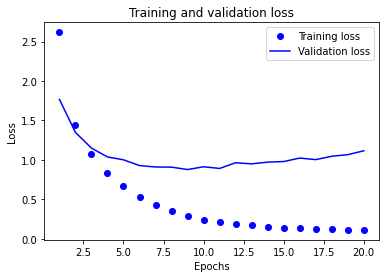

In [ ]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

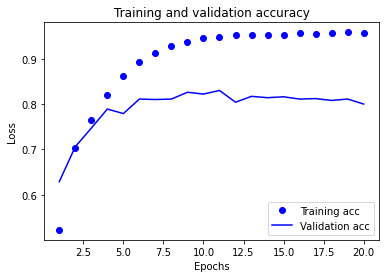

In [ ]:
#Plotting the training and validation accuracy
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 126us/step - loss: 2.6053 - accuracy: 0.5115 - val_loss: 1.7417 - val_accuracy: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.4100 - accuracy: 0.7151 - val_loss: 1.3141 - val_accuracy: 0.7270
Epoch 3/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.0349 - accuracy: 0.7881 - val_loss: 1.1313 - val_accuracy: 0.7610
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.8117 - accuracy: 0.8319 - val_loss: 1.0571 - val_accuracy: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.6474 - accuracy: 0.8626 - val_loss: 0.9742 - val_accuracy: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.5170 - accuracy: 0.8940 - val_loss: 0.9472 - val_accuracy: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.417

In [ ]:
results

[0.9913175069956724, 0.7987533211708069]